In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [66]:
data=pd.read_csv("C:/Users/User/Desktop/focus.csv")

In [67]:
print(data.head(5))

    model  year  price transmission  mileage fuelType  engineSize
0   Focus  2016   8000       Manual    38852   Petrol         1.0
1   Focus  2019  13400       Manual    11952   Petrol         1.0
2   Focus  2019  14600       Manual    22142   Petrol         1.5
3   Focus  2016   9450       Manual    14549   Diesel         1.6
4   Focus  2015   9999       Manual     7010   Diesel         1.6


In [68]:
data=data.drop(['transmission','fuelType','model','engineSize'], axis=1)
#Sadece sayısal değerlerle işlem yapmak istediğim için transmission, model ve fuelType değişkenlerini kaldırdım.

In [69]:
data=data[~data.year.isnull()].copy()
data.isnull().sum()
#İçinde değer olmayan year kolonunun satırlarını silmek için bu kodu yazdım.
#Ardından diğer kolonlarda içinde değer olmayan hücre var mı diye kontrol ettim.
#İçinde değer olmayan herhangi bir hücrenin olmadığını gördüm.

year       0
price      0
mileage    0
dtype: int64

In [70]:
mean_price=data["price"].mean()
#fiyatların ortalamasını buldum.

In [71]:
print(mean_price)

13581.95837917125


In [72]:
mean_year=data["year"].mean()
#üretim yıllarının ortalamasını buldum. Ve tam sayıya çevirdim

In [73]:
print(int(mean_year))

2017


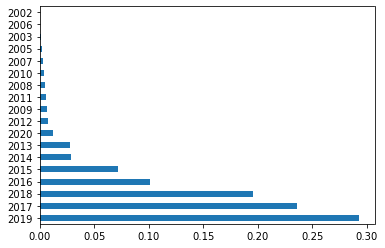

In [74]:
data.year.value_counts(normalize=True)
data.year.value_counts(normalize=True).plot.barh()
#Üretim yıllarına göre araba sayısını sütun grafiğinde gösterdim.

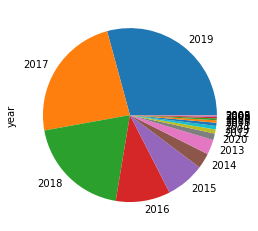

In [75]:
data.year.value_counts(normalize=True)
data.year.value_counts(normalize=True).plot.pie()
#Üretim yıllarına göre araba sayısını pasta grafiğinde gösterdim

In [76]:
data.describe()
#Veri setinin durumunu tanımladım

,year,price,mileage
count,5454.000000,5454.000000,5454.000000
mean,2017.113495,13581.958379,22876.582692
std,2.170301,4737.282779,20596.754387
min,2002.000000,495.000000,1.000000
25%,2016.000000,10489.250000,9137.000000
50%,2017.000000,13299.500000,15944.500000
75%,2019.000000,16987.250000,30000.000000
max,2020.000000,54995.000000,177644.000000


In [77]:
data.shape
#Veri setinin kaça kaç olduğunu gösterdim

(5454, 3)

In [78]:
x=data.drop(["price"],axis=1)
#Bağımsız değişkenleri x'e kaydettim
y=data["price"]
#Bağımlı değişkenleri y'ye kaydettim

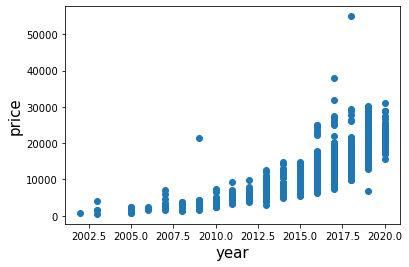

In [79]:
plt.scatter(x['year'],y)
plt.xlabel('year', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.show()
#Üretim yılı ve fiyat arasında pozitif yönde doğrusal bir ilişki var

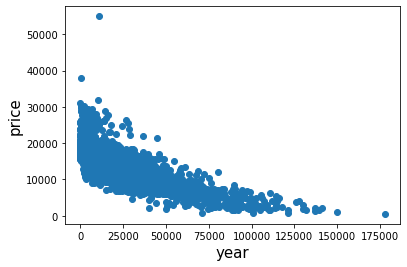

In [80]:
plt.scatter(x['mileage'],y)
plt.xlabel('year', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.show()
#Mil ve fiyat arasında negatif yönde doğrusal bir ilişki var#

In [81]:
#Doğrusal ilişki olduğunu gördüğümüze göre doğrusal regresyon kullanabiliriz.

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Eğitim ve test veri seti olmak üzere parçalamak için gerekli kütüphaneleri ekledim.

In [83]:
print(x)

      year  mileage
0     2016    38852
1     2019    11952
2     2019    22142
3     2016    14549
4     2015     7010
...    ...      ...
5449  2019     7855
5450  2019    13891
5451  2019    13452
5452  2019    13376
5453  2019     7886

[5454 rows x 2 columns]


In [84]:
print(y)

0        8000
1       13400
2       14600
3        9450
4        9999
        ...  
5449    18745
5450    16350
5451    16850
5452    17310
5453    17610
Name: price, Length: 5454, dtype: int64


In [85]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.25, random_state=42)
#%25 test seti olacak şekilde ayarladım.

In [86]:
model=LinearRegression().fit(x,y)

In [87]:
model.intercept_
#Kesim noktasını buldum.#

-2045801.7546963745

In [88]:
model.coef_
#Regresyon katsayılarını buldum

array([ 1.02190286e+03, -8.35061992e-02])

In [89]:
model.score(x_train,y_train)

0.6227545417959135

In [90]:
model.score(x_test,y_test)

0.6351264119341642

In [91]:
#Accurcy'nin düşük çıkmasının nedeni en başta bazı features'ları çıkarmamdır. 

In [92]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [93]:
model.score(x_train,y_train)

0.622794740158432

In [94]:
x_train.shape

(4090, 2)

In [95]:
r2=model.score(x_train,y_train)
print("r2=",r2)
n=x_train.shape[0]
p=x_train.shape[1]
adjuseted_r2=1-(1-r2)*(n-1)/(n-p-1)
print("adjuseted r2=",adjuseted_r2)

r2= 0.622794740158432
adjuseted r2= 0.6226101523141249


In [96]:
#r^2 ve adjusted r^2 birbirine yakın. Yani değişken eklemek çok fazla cezayalandırmaya neden olmaz

In [97]:
model.fit(x_test,y_test)

LinearRegression()

In [98]:
model.score(x_test,y_test)

0.6354586411181136

In [99]:
x_test.shape

(1364, 2)

In [100]:
r2=model.score(x_test,y_test)
print("r2=",r2)
n=x_test.shape[0]
p=x_test.shape[1]
adjuseted_r2=1-(1-r2)*(n-1)/(n-p-1)
print("adjuseted r2=",adjuseted_r2)

r2= 0.6354586411181136
adjuseted r2= 0.6349229447788309


In [101]:
model.predict([[2010,5000]])
#2010 model 5000 milde olan bir arabanın tahmini fiyatı

array([7492.08128575])

In [102]:
model.predict([[2015,5000]])

array([12772.21530971])

In [103]:
#2015 model 5000 milde olan bir arabanın tahmini fiyatı